In [1]:
# Load semua library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
from ipywidgets import interact
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

plt.rcParams['figure.figsize'] = [20,5]

In [2]:
colors = np.array(sns.color_palette())

# k-Means

k-Means merupakan algoritma untuk _unsupervised learning_, dalam hal ini adalah untuk tugas _clustering_. Dalam _clustering_, kita berusaha melihat subpopulasi dalam data dengan melihat kesamaan dari elemen di tiap subpopulasi tersebut. Idenya adalah dengan menggunakan **centroids** atau titik-titik pusat yang mendefinisikan klaster-klaster yang ada. Tiap _centroid_ merupakan representasi dari nilai rata-rata dari objek yang masuk ke dalam klaster tersebut.

<h4> 1) Generate random dummy cluster </h4>

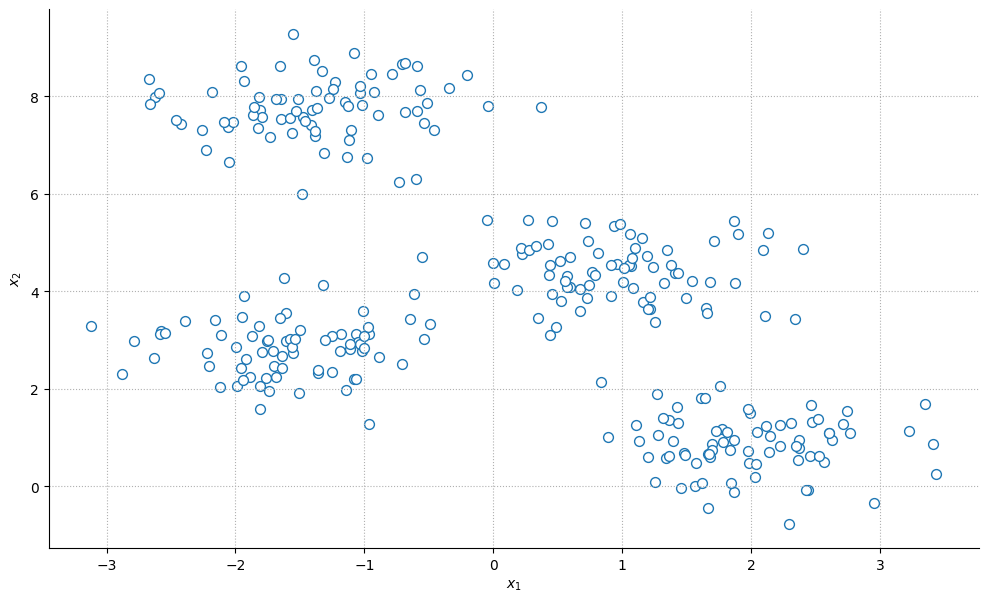

In [3]:
# Kode diadaptasi dari https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

X, y_true = make_blobs(
                  n_samples    = 300, 
                  centers      = 4,
                  cluster_std  = 0.60, 
                  random_state = 0
                ) #Atribut center menentukan banyaknya data yang dikelompokan

fig, ax = plt.subplots(figsize = (12, 7))
plt.scatter(X[:, 0], X[:, 1], s = 50, edgecolors = colors[0], facecolors = 'white')
plt.grid(linestyle=':')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
sns.despine()

<h4> 2) Pemberian label dan clustering </h4>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


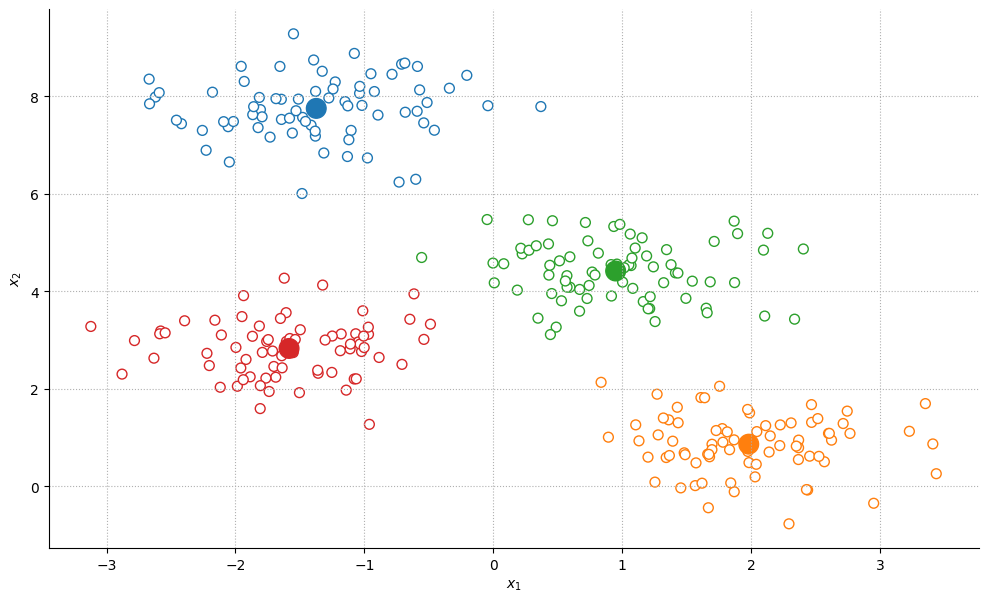

In [4]:
mdl       = KMeans(4, random_state = 42) #Angka 4 menunjukkan banyaknya cluster yang akan dibentuk
cluster   = mdl.fit_predict(X)
centroids = mdl.cluster_centers_         #variabel centroids berisi koordinat x,y yang menjadi titik pusat setiap cluster

fig, ax = plt.subplots(figsize = (12, 7))
plt.scatter(*X.T, s = 50, edgecolors = colors[cluster], facecolor = 'white')
plt.scatter(*centroids.T, s = 200, c = colors[range(4)])
plt.grid(linestyle=':')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
sns.despine()

Pertanyaannya adalah bagaimana cara menentukan nilai $k$?

Ada beberapa cara:

1. Gunakan label kelas, sebagai contoh, 10 untuk MNIST
2. Gunakan V atau _inertia_ atau jarak agregat intraklaster (total jarak antara tiap data dalam suatu klaster dengan _centroid_-nya) $$V = \sum_{j} \sum_{x_i \rightarrow c_j} D(c_j, x_i)^2$$ lalu gunakan _elbow method_ (saat turunan curam berubah menjadi landai paling ekstrem)
3. Menggunakan teknik silhouette Analysis, yaitu ukuran seberapa mirip sebuah data didalam clusternya dibandingkan dengan cluster lain. Metode melakuka silhouette analysis berupa:
  - Pilih range nilai k (misal 1 sampai 10).
  - Plot Silhouette koefisien untuk setiap nilai k.
Rumus mencari Silhouette koefisien berupa $$S(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}$$ dengan:
    - S(i) is the silhouette coefficient of the data point i.
    - a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
    - b(i) is the average distance from i to all clusters to which i does not belong.
Kemudian hitung silhouette rata-rata untuk setiap k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

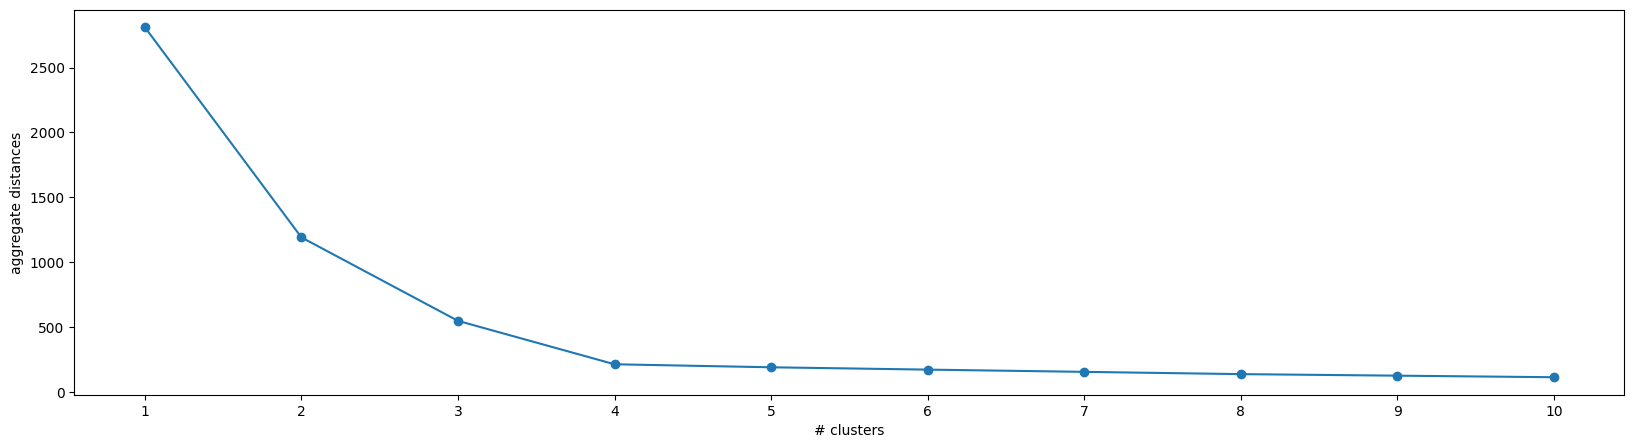

In [5]:
X, y_true = make_blobs(300, centers = 4, cluster_std = 0.60, random_state = 0)

v = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    v.append(kmeans.inertia_)

plt.plot(range(1, 11), v, 'o-')
plt.xticks(range(1, 11), range(1, 11))
plt.xlabel('# clusters')
plt.ylabel('aggregate distances');

Berdasarkan <i> elbow method </i>, nilai $k$ dapat ditentukan dengan melihat perubahan penurunan grafik diatas, nilai k yang dipilih adalah ketika penurunan grafik berubah dari curam ke landai. (Dalam hal ini, $k$ = 4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


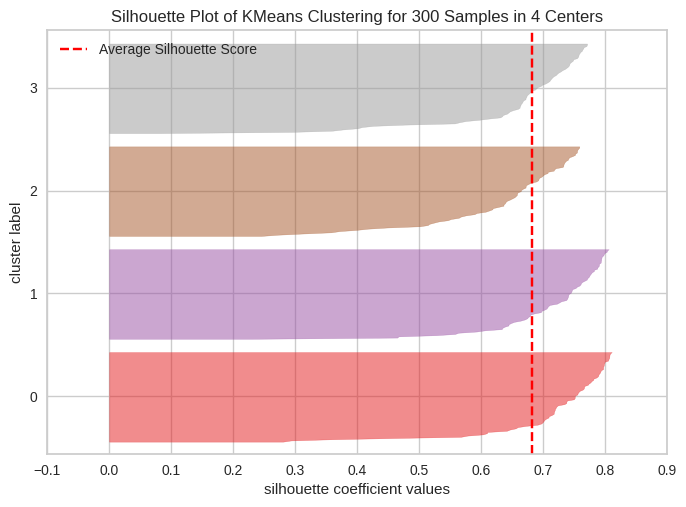

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model_4clust = KMeans(n_clusters = 4, random_state = 42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

Nilai silhouette analysis yang mendekati 1 menunjukkan hasil yg bagus, dari hasil diatas dapat disimpulkan bahwa cluster sejumlah 4 buah sudah cukup bagus bagi data kita.

## Masalah pada K-Means

In [7]:
# Kode dari https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
# Perhatikan bahwa klaster yang kita bentuk merupakan hasil dari KMeans dengan menggunakan library

n_samples    = 1500
random_state = 170
X, y         = make_blobs(n_samples = n_samples, random_state=random_state)

In [8]:
X

array([[-5.19811282e+00,  6.41869316e-01],
       [-5.75229538e+00,  4.18627111e-01],
       [-1.08448984e+01, -7.55352273e+00],
       ...,
       [ 1.36105255e+00, -9.07491863e-01],
       [-3.54141108e-01,  7.12241630e-01],
       [ 1.88577252e+00,  1.41185693e-03]])

In [9]:
y

array([1, 1, 0, ..., 2, 2, 2])

<h4> 1) Incorrect Number of Blobs </h4>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


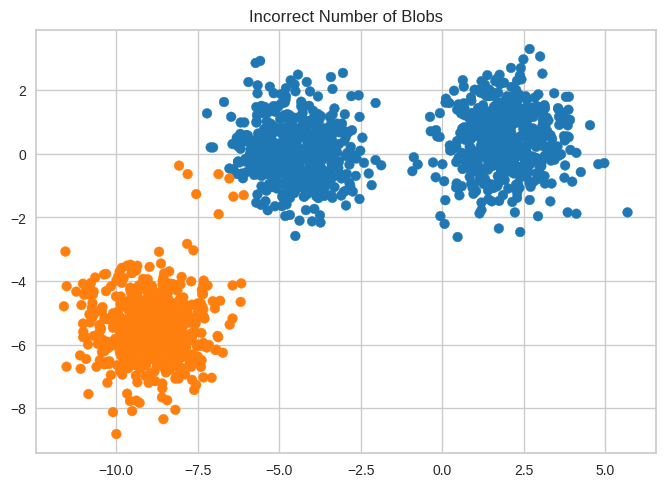

In [10]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=colors[y_pred])
plt.title("Incorrect Number of Blobs")
plt.show()

<h4> 2) Anisotropicly Distributed Blobs </h4>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


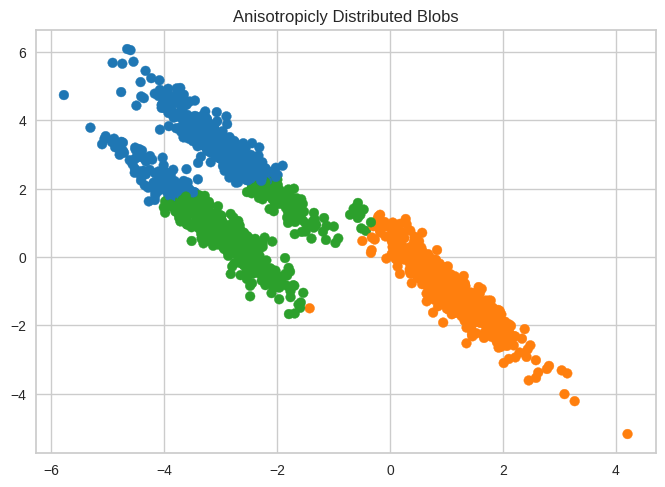

In [11]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=colors[y_pred])
plt.title("Anisotropicly Distributed Blobs")
plt.show()

<h4> 3) Unequal Variance </h4>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


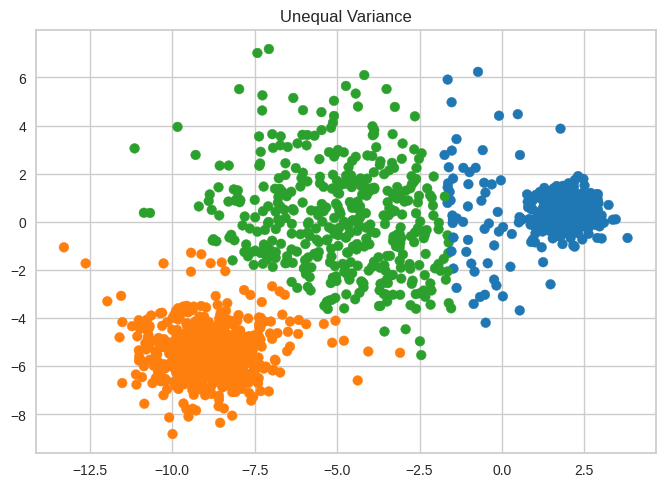

In [12]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=colors[y_pred])
plt.title("Unequal Variance")
plt.show()

<h4> 4) Unevenly Sized Blobs </h4>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


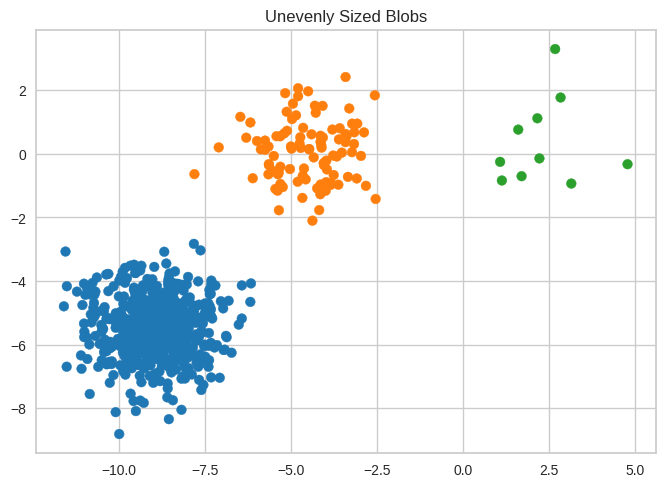

In [13]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=colors[y_pred])
plt.title("Unevenly Sized Blobs")
plt.show()

## Aplikasi: Kompresi Citra

In [14]:
img = Image.open('macaws.jpg')
X = np.array(img) #X merupakan array pixel dari gambar dengan format (R,G,B)

In [15]:
data = X.reshape(-1, 3) / 255
mdl = MiniBatchKMeans(16)
mdl.fit(data)
X_map = mdl.cluster_centers_[mdl.predict(data)]
X_map = X_map.reshape(X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    ax[2].scatter(G, B, color=colors, marker='.')
    ax[2].set(xlabel='Green', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

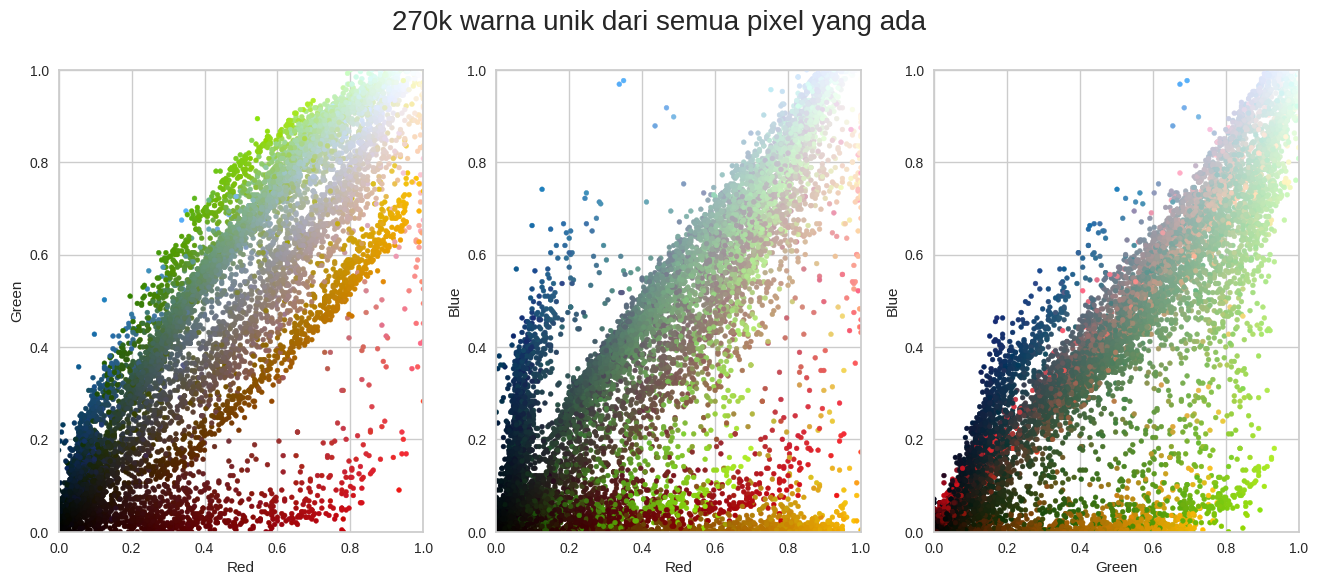

In [17]:
plot_pixels(data, title='270k warna unik dari semua pixel yang ada');

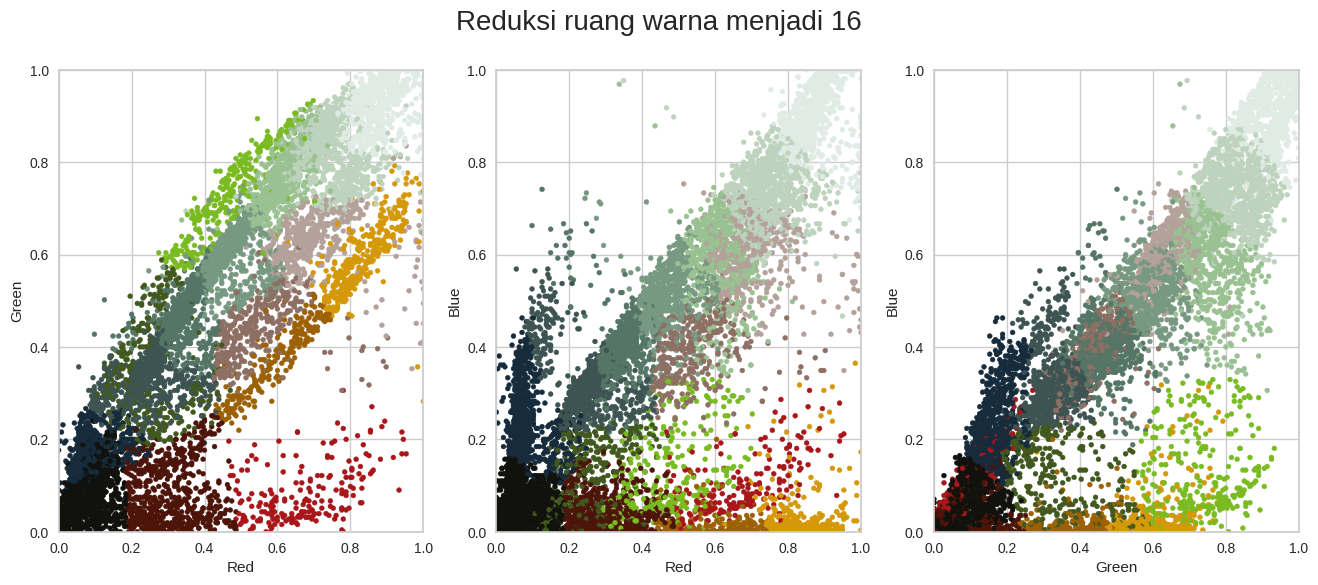

In [18]:
plot_pixels(data, colors=X_map.reshape(-1, 3), title="Reduksi ruang warna menjadi 16");

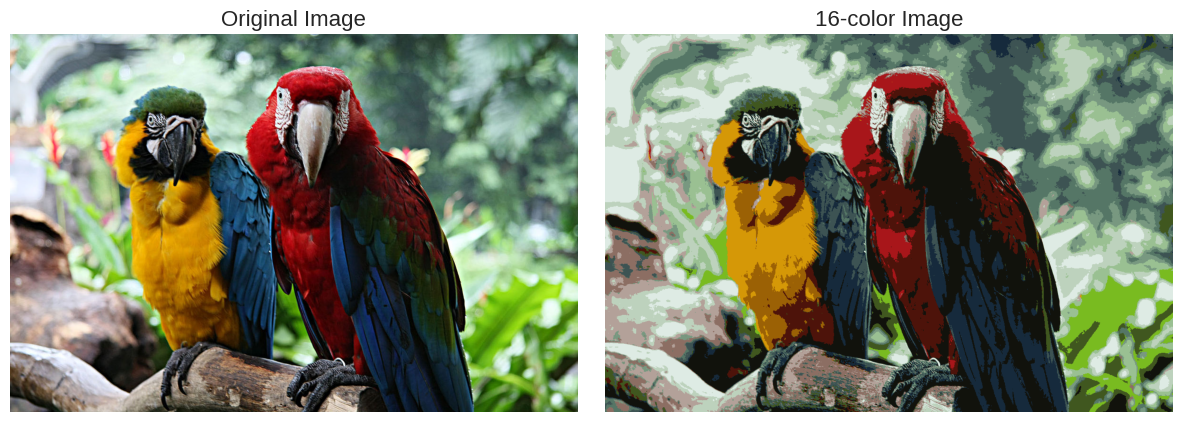

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(X) #X merupakan value RGB dari gambar sebenarnya
ax[0].set_title('Original Image', size=16)
ax[0].axis('off')
ax[1].imshow(X_map)#X_map merupakan value dari RGB yang sudah direduksi / diolah kembali
ax[1].set_title('16-color Image', size=16)
ax[1].axis('off');

# Code from The Scratch

In [20]:
def group_assignment(points, centroids):
    c = []    # tempat menyimpan index grup

    # mengulang untuk setiap titik
    for i in range(len(points)):

        # cari jarak ke setiap centroid
        list_distance = []
        for j in range(len(centroids)):
            dist = np.linalg.norm(points[i] - centroids[j])
            list_distance.append(dist)

        # cari centroid dengan distance minimum
        min_dist = min(list_distance)
        for j in range(len(centroids)):
            if min_dist == list_distance[j]:
                min_centroid = j+1
                break

        c.append(min_centroid)
    
    c = np.array(c)    
    return c

In [21]:
def update_centroid(points, c, centroids):
    list_new_centroids = []
    
    for j in range(len(centroids)):
        
        # Kumpulkan point yang ada pada 1 centroid
        point_in_centroid = []
        
        for i in range(len(points)):
            if c[i] == j+1:
                point_in_centroid.append(points[i])
    
        # Cari centroid baru
        # Jumlah point
        points_sum = np.sum(point_in_centroid, axis=0)

        # New centroid
        new_centroid = (1/len(point_in_centroid))*points_sum
        
        list_new_centroids.append(new_centroid)
    
    list_new_centroids = np.array(list_new_centroids)    
    return list_new_centroids

In [22]:
def clustering_objective(points, c, centroids):
    J_obj = 0

    # Cari jumlah J_obj
    for i in range(len(points)):
        for j in range(len(centroids)):
            if c[i] == j+1:
                J_obj += (np.linalg.norm(points[i] - centroids[j]))**0.5

    # Cari rataan J_obj
    J_obj = J_obj/len(points)
    
    return J_obj

In [23]:
def kMeans_algorithm(points, centroids, epsilon=1e-6):
    iteration = 0
    J_obj_list = []
    Stop = False
    
    while Stop == False:
        # 1. Assign group
        c = group_assignment(points, centroids)
        
        # 2. Update centroid
        new_centroids = update_centroid(points, c, centroids)

        # 3. Clustering objective
        J_obj = clustering_objective(points, c, centroids)
        
        # 4. Tambahkan J_obj kedalam J_obj_list
        J_obj_list.append(J_obj)
        
        # 5. Update iteration
        iteration += 1
        
        # 6. Stopping criterion
        if np.linalg.norm(new_centroids - centroids) < epsilon:
            Stop = True
        else:
            # Update centroids
            centroids = new_centroids
           
    return new_centroids, c, J_obj_list, iteration

### Penerapan K-means secara manual (from the scratch)

<h4> 1) Generate data dan cetroid </h4>

In [24]:
points = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],
                        [[1,1] + 0.3*np.random.randn(2) for i in range(100)], 
                        [[1,-1] + 0.3*np.random.randn(2) for i in range(100)]])

# centroid
centroids = np.array([[0.0, 0.0],
                      [0.1, 0.5],
                      [-0.5, -1.0]])

<h4> 2) Plot data hasil generate </h4>

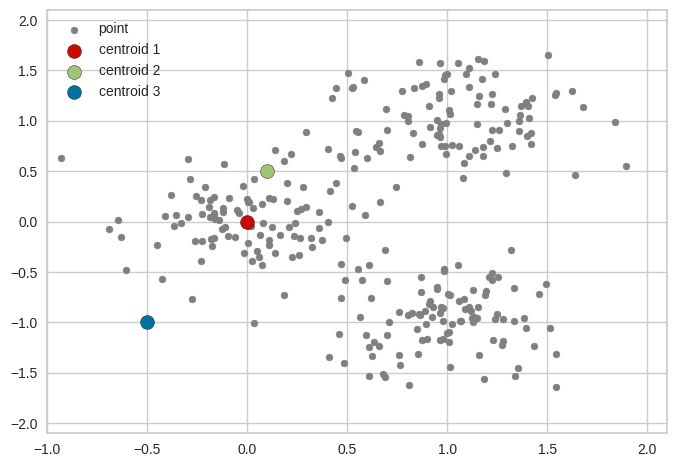

centroids:
centroid-0 : [0. 0.]
centroid-1 : [0.1 0.5]
centroid-2 : [-0.5 -1. ]


In [25]:
# Plot Initial
plt.scatter(points[:,0], points[:,1], c='grey', s=25, label='point')
plt.scatter(centroids[0,0], centroids[0,1], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(centroids[1,0], centroids[1,1], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(centroids[2,0], centroids[2,1], c='b', edgecolor='k', s=100, label='centroid 3')

plt.xlim(-1.0, 2.1)
plt.ylim(-2.1, 2.1)
plt.legend()
plt.show()

print(f'centroids:')
for i in range(len(centroids)):
    print(f'centroid-{i} : {np.round(centroids[i], 2)}')

<h4> 3) Aplikasikan algoritma K-means yang sudah dibuat diatas </h4>

In [26]:
centroids, c, J_obj_list, iteration = kMeans_algorithm(points, centroids, epsilon=1e-6)

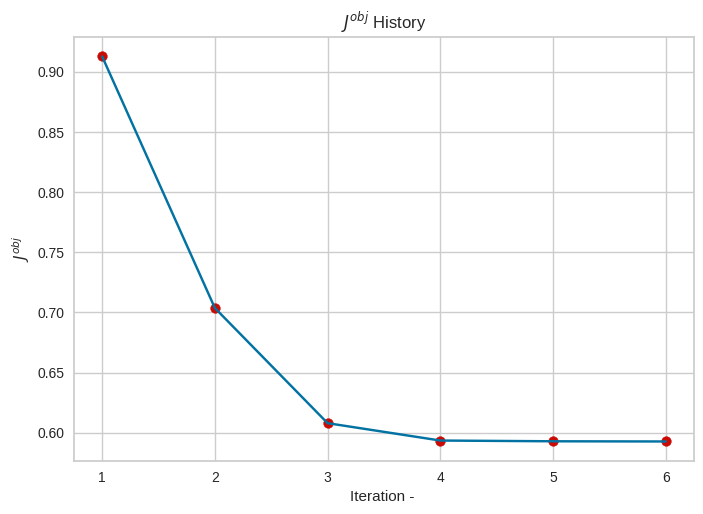

The final J_obj = 0.5927


In [27]:
# Plot History
plt.plot([i+1 for i in range(iteration)], J_obj_list)
plt.scatter([i+1 for i in range(iteration)], J_obj_list, c='r')
plt.title('$J^{obj}$ History')
plt.xlabel('Iteration - ')
plt.ylabel('$J^{obj}$')
plt.show()
print(f'The final J_obj = {J_obj_list[-1]:.4f}') #Tampilkan hanya 4 angka di belakang koma

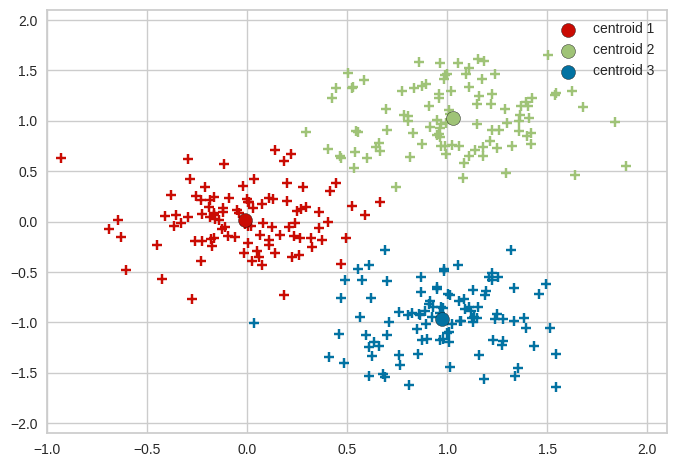

centroids:
centroid-1 : [-0.01  0.01]
centroid-2 : [1.03 1.02]
centroid-3 : [ 0.97 -0.96]


In [28]:
# Plot Final
for i in range(len(c)):
    if c[i] == 1:
        plt.scatter(points[i,0], points[i,1], c='r', marker='+')
    elif c[i] == 2:
        plt.scatter(points[i,0], points[i,1], c='g', marker='+')
    else:
        plt.scatter(points[i,0], points[i,1], c='b', marker='+')
plt.scatter(centroids[0,0], centroids[0,1], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(centroids[1,0], centroids[1,1], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(centroids[2,0], centroids[2,1], c='b', edgecolor='k', s=100, label='centroid 3')

plt.xlim(-1.0, 2.1)
plt.ylim(-2.1, 2.1)
plt.legend()
plt.show()

print(f'centroids:')
for i in range(len(centroids)):
    print(f'centroid-{i+1} : {np.round(centroids[i], 2)}')

# Code from Library

In [33]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# Read data

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
# Preprocessing

# Drop unused feature
df.drop("CustomerID", axis=1, inplace = True)

# Label encoding
labelEncoder = LabelEncoder() 
df["Genre"] = labelEncoder.fit_transform(df["Genre"])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

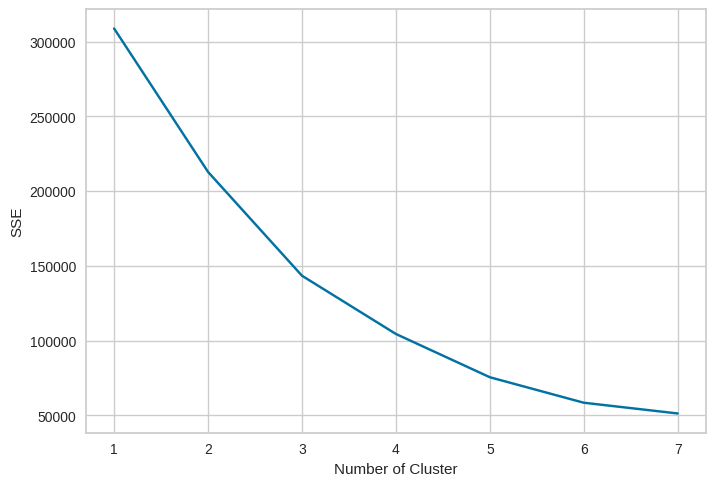

In [38]:
# Find best k using elbow method

clusters        = [1,2,3,4,5,6,7]
sse             = {} # sum of squared error dictionary
cluster_centers = {} # cluster point dictionary

for k in clusters:
    kmeans                  = KMeans(n_clusters = k, max_iter = 1000).fit(df) # latih kmeans untuk setiap k
    df["clusters"+ str(k)]  = kmeans.labels_                                  # catat hasil clustering untuk setiap data
    cluster_centers[str(k)] = kmeans.cluster_centers_                         # catat posisi cluster center untuk setiap k
    sse[k]                  = kmeans.inertia_                                 # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

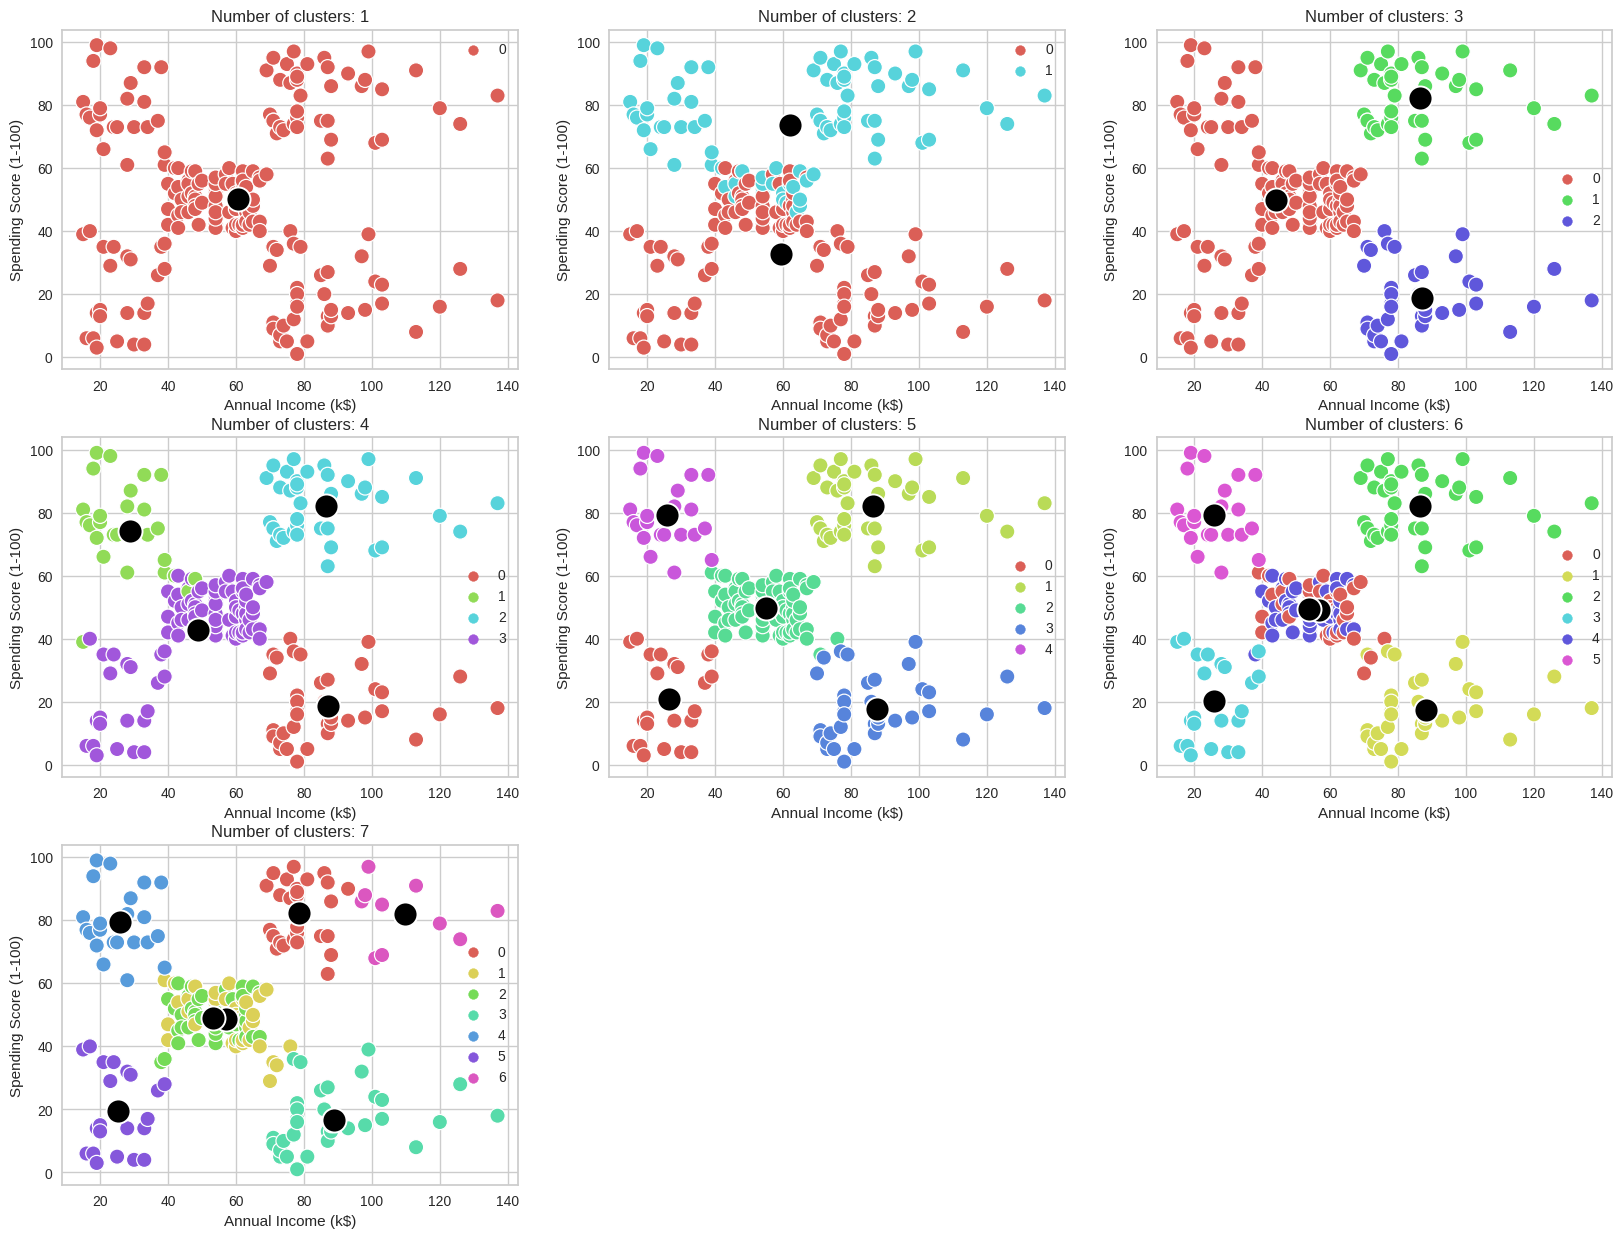

In [39]:
# Plot hasil

plt.figure(figsize=(20,15))

for i, k in enumerate(clusters):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(
      x       = df["Annual Income (k$)"], 
      y       = df["Spending Score (1-100)"], 
      hue     = df['clusters' + str(k)], 
      s       = 120, 
      palette = sns.color_palette("hls", k)
    )

    sns.scatterplot(
      x     = cluster_centers[str(k)][:,2], 
      y     = cluster_centers[str(k)][:,3], 
      color = 'black', 
      s     = 300
    ) # 3 dan 4 karena kolom yg di plot kolom 2 dan kolom 3
    plt.title('Number of clusters: ' + str(k))
    
plt.show()

In [40]:
# Analisis hasil untuk memberi label pada hasil clustering

for i in range(5):
  print('cluster-', i)
  print(df[df["clusters5"] == i].mean())
  print()

cluster- 0
Genre                      0.391304
Age                       45.217391
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
clusters1                  0.000000
clusters2                  0.000000
clusters3                  0.000000
clusters4                  2.913043
clusters5                  0.000000
clusters6                  3.043478
clusters7                  4.739130
dtype: float64

cluster- 1
Genre                      0.461538
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
clusters1                  0.000000
clusters2                  1.000000
clusters3                  1.000000
clusters4                  2.000000
clusters5                  1.000000
clusters6                  2.000000
clusters7                  1.538462
dtype: float64

cluster- 2
Genre                      0.4125
Age                       42.9375
Annual Income (k$)        55.0875
Spending Score (1-100)    49.7125
cluster

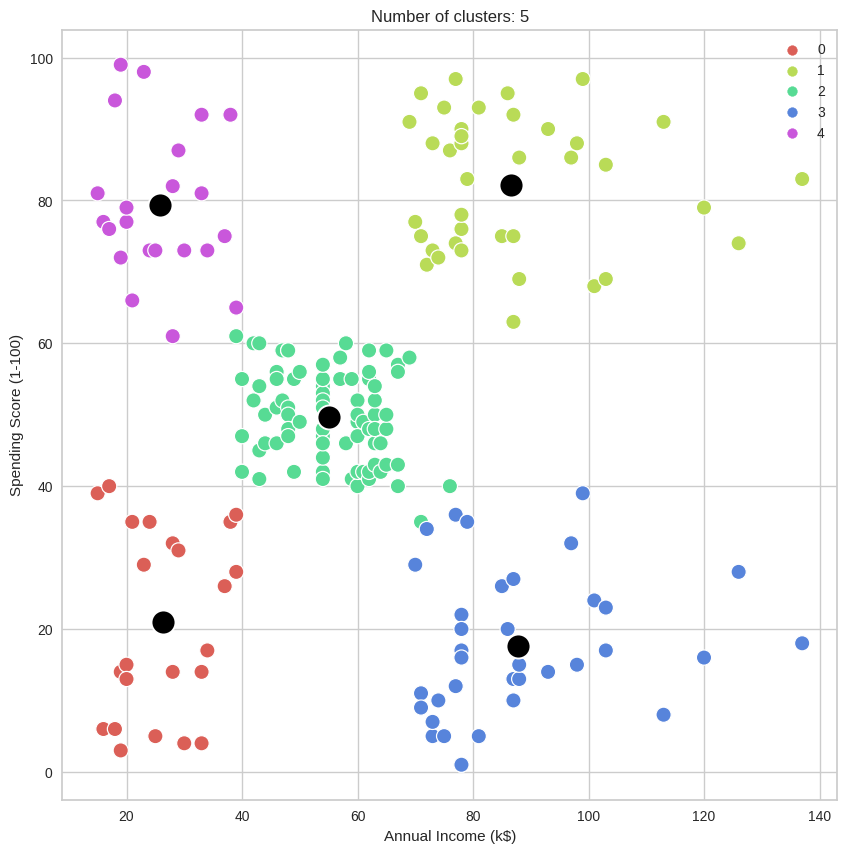

In [41]:
# Label hasil analisis

'''
0 -> low income passive spender
1 -> high income aggresive spender
2 -> moderate income moderate spender (neutral)
3 -> low income passive spender
4 -> high income passive spender
'''

plt.figure(figsize=(10,10))

sns.scatterplot(
  x       = df["Annual Income (k$)"], 
  y       = df["Spending Score (1-100)"], 
  hue     = df['clusters5'], 
  s       = 120, 
  palette = sns.color_palette("hls", 5)
)

sns.scatterplot(
  x     = cluster_centers[str(5)][:,2], 
  y     = cluster_centers[str(5)][:,3], 
  color = 'black', 
  s     = 300
) 

plt.title('Number of clusters: ' + str(5))   
plt.show()

## Simulasi

Lengkapi bagian koding yang tidak lengkap dari percobaan diatas.

## Laporan Akhir

- Pilih dataset lain dari link ini: https://archive.ics.uci.edu/ml/datasets.php?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
- Lakukan pre-processing data jika diperlukan.
- Jelaskan secara singkat mengenai isi dari dataset tersebut
- Carilah k terbaik dengan elbow method, plotkan
- Plot hasil akhir clustering
- Tulis kesimpulan

BONUS -> ulangi percobaan dengan menggunakan metode mencari nilai k yang lain, lalu bandingkan dan jelaskan perbedaannya dengan percobaan yang dilakukan menggunakan metode elbow.

Note : Mohon untuk memberikan keterangan dari setiap kolom kode yang dijalankan pada file .ipynb